<a href="https://colab.research.google.com/github/kerenalli/MyExamplePython/blob/main/20200104_Video_to_Audio_Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tutorial on Video Processing**
Import the obama video from disk
Extract audio
Convert it to wav
Extract text from wav file
Display

In [1]:
!pip install numpy

In [2]:
!pip install moviepy

In [3]:
!pip install pytube

     |████████████████████████████████| 51kB 3.1MB/s 


Steps:
1. Open the video file or camera using cv2.VideoCapture()
2. Creates a folder to save Images
3. Read frame by frame
4. Save each frame using cv2.imwrite()
5. Release the VideoCapture and destroy all window






In [8]:
import cv2
import os
#Define video path
videofile='/content/obama.mp4'
vidcap=cv2.VideoCapture(videofile)
#get frame rate of video
vidcap.get(5)
#creating a folder to save Images if folder not existed
if not os.path.exists('Image_frames'):
    os.makedirs('Images_frames')
x=0   
while(vidcap.isOpened()):
    frameId = vidcap.get(1) #current frame number
    ret, frame = vidcap.read()
    if (ret != True):
        break

    filename = './Images_frames/frame' +  str(int(x)) + ".jpg"
    x+=1
    cv2.imwrite(filename, frame)

vidcap.release()
print ("Done!")
cv2.destroyAllWindows()

Done!


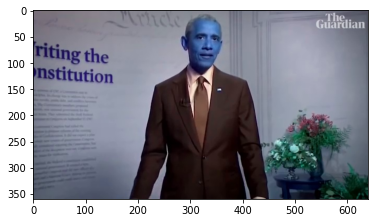

In [9]:
import matplotlib.pyplot as plt
img=cv2.imread('/content/Images_frames/frame1022.jpg')
plt.imshow(img)

5. Extract Audio from Video

In [10]:
from moviepy.editor import *
videoclip = VideoFileClip("/content/obama.mp4")
#Extract Audio from Video
audioclip = videoclip.audio
#Save the Audio file (.mp3)
audioclip.write_audiofile("Audio_fetched.mp3")

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2457600/45929032 bytes (5.4%)5955584/45929032 bytes (13.0%)9740288/45929032 bytes (21.2%)13131776/45929032 bytes (28.6%)16850944/45929032 bytes (36.7%)20389888/45929032 bytes (44.4%)23175168/45929032 bytes (50.5%)26607616/45929032 bytes (57.9%)29974528/45929032 bytes (65.3%)33439744/45929032 bytes (72.8%)36732928/45929032 bytes (80.0%)39837696/45929032 bytes (86.7%)

100%|██████████| 4548/4548 [00:04<00:00, 972.08it/s]

[MoviePy] Done.


Extract the text from audio

In [11]:
!pip install pydub

In [12]:
!pip install SpeechRecognition

     |████████████████████████████████| 32.8MB 132kB/s 


In [15]:
#Convert the audio to text 
import speech_recognition as sr
from os import path
from pydub import AudioSegment
import os

# convert mp3 file to wav                                                       
sound = AudioSegment.from_mp3("/content/Audio_fetched.mp3")
sound.export("transcript.wav", format="wav")


# transcribe audio file                                                         
AUDIO_FILE = "transcript.wav"

# use the audio file as the audio source                                        
r = sr.Recognizer()
with sr.AudioFile(AUDIO_FILE) as source:
        audio = r.record(source)  # read the entire audio file                  
        print("Transcription: " + r.recognize_google(audio))#Write it to text

Transcription: the one constitutional office elected by all of the people is the presidency so the minimum we should expect a president to feel a sense of responsibility for the safety and Welfare of all 330 million of us regardless of what we look like how we worship who we love how much money we have or who we voted for highest sat in the Oval Office with both of the men who are running for president job seriously and discover some reverence for the Democracy that had been placed in his care but he never did for close to four years now he has shown interest in putting into work no interest in finding common ground no interest in using the awesome power of his office to help anyone but himself and his friends about what this country that we love stands for today and for all our days to come stay safe God bless
